# Titanic

- ref : https://www.kaggle.com/competitions/titanic/data
- Data desc.
<pre>
survival  :  Survival                    0 = No, 1 = Yes
pclass    :  Ticket class                1 = 1st, 2 = 2nd, 3 = 3rd
sex       :  Sex
Age       :  Age in years
sibsp     :  of siblings / spouses aboard the Titanic
parch     :  of parents / children aboard the Titanic
ticket    :  Ticket number
fare      :  Passenger fare
cabin     :  Cabin number
embarked  :  Port of Embarkation         C = Cherbourg, Q = Queenstown, S = Southampton

# 1. Data Load
- head()
- info()
- shape

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
train=pd.read_csv("./train.csv")
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
train.info()
# 숫자에 결측이 있을 때 float
# 문자에 결측이 있을 때는 object

# age float -> 결측
# Embarked 2명의 탑승지?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.shape

(891, 12)

In [6]:
train.columns=train.columns.str.lower()
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

# 2. 결측 확인

In [7]:
train.isna().sum() [ train.isna().sum() > 0 ].sort_values(ascending=False)

cabin       687
age         177
embarked      2
dtype: int64

- 출력결과 다음과 같이 출력
<pre>
col       cnt       nan_cnt      rate
age       891         177        23%

In [8]:
col = train.columns
cnt= train.notna().sum()
nan_cnt = train.isna().sum()
rate = round((nan_cnt/train.shape[0])*100,2)
unique_cnt= train.nunique()

In [9]:
dic={"cnt":cnt,"nan_cnt":nan_cnt,"rate":rate,"unique_cnt": unique_cnt}
nandf=pd.DataFrame(dic)
nandf.T

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
cnt,891.0,891.0,891.0,891.0,891.0,714.00,891.0,891.0,891.0,891.0,204.0,889.00
nan_cnt,0.0,0.0,0.0,0.0,0.0,177.00,0.0,0.0,0.0,0.0,687.0,2.00
rate,0.0,0.0,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.0,77.1,0.22
unique_cnt,891.0,2.0,3.0,891.0,2.0,88.00,7.0,7.0,681.0,248.0,147.0,3.00


In [10]:
cs=pd.Series(col)
cnt_s =pd.Series(cnt)
nan_cnt_s = pd.Series(nan_cnt)
rate_s = pd.Series(rate)

In [11]:
df =pd.DataFrame(cnt_s, columns=['cnt'])

In [12]:
df['nan_cnt']=nan_cnt_s
df['rate']=rate_s

In [13]:
df

,cnt,nan_cnt,rate
passengerid,891,0,0.00
survived,891,0,0.00
pclass,891,0,0.00
name,891,0,0.00
sex,891,0,0.00
age,714,177,19.87
sibsp,891,0,0.00
parch,891,0,0.00
ticket,891,0,0.00
fare,891,0,0.00


# 3. 중복값 확인
- df[컬럼].unique()
- df[컬럼].nunique()  
- unique는 대부분 drop 대상

select distinct job from emp;

In [14]:
train['sex'].unique()

array(['male', 'female'], dtype=object)

In [15]:
#len(train['sex'].unique())
train['sex'].nunique()

2

In [16]:
train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [17]:
# 컬럼별 유니크 개수
for col in train.columns:
    if train[col].nunique()<100:
        print(col, train[col].nunique(), train[col].unique())


survived 2 [0 1]
pclass 3 [3 1 2]
sex 2 ['male' 'female']
age 88 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
sibsp 7 [1 0 3 4 2 5 8]
parch 7 [0 1 2 5 3 4 6]
embarked 3 ['S' 'C' 'Q' nan]


# 4. EDA
- EDA (Exploratory Data Analysis, 탐색적 데이터 분석)
- 통계적 분석 & 차트(시각화)

In [18]:
# ! 는 파이참에서의 터미널에서 설치하는 것과 동일한 역할
# 단 주피터를 껏다 켜야 파이참에서 인식함

In [19]:
##### ! pip install matplotlib

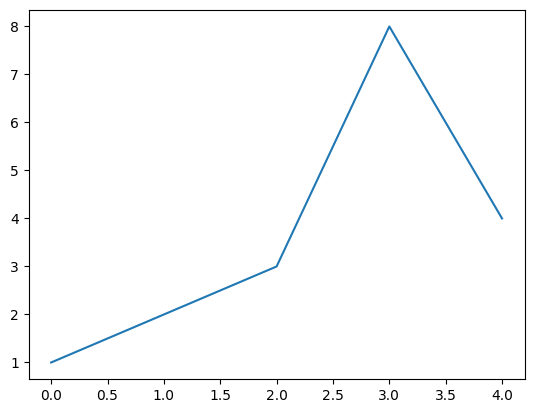

In [20]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,8,4]) # iterable : 반복되어질 수 있는 것 넣기
plt.show()

# 5. 데이터 분석

## 5.1 passengerid : all unique drop()
- unipue 해서 패턴을 보이지 않음   -->분석대상에서 제외

In [21]:
train=train.drop('passengerid',axis=1)

In [22]:
train.head(1)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


## 5.2 survived : target

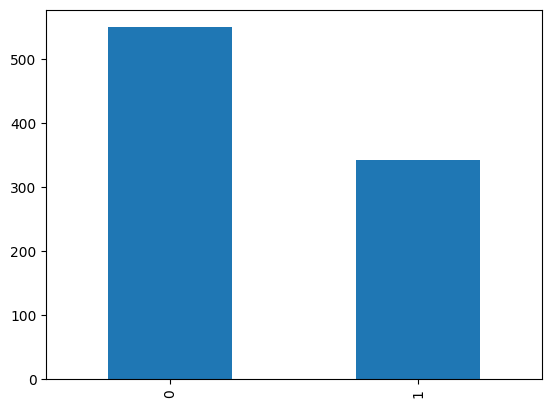

In [23]:
#pandas 내에도 plot 존재함
train['survived'].value_counts().plot(kind='bar') 
plt.show()

## 5.3 pclass : 주요 feature(columns)

In [24]:
#train.groupby('pclass')['pclass'].count()
train['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [25]:
train[['pclass','survived']].value_counts().sort_index()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

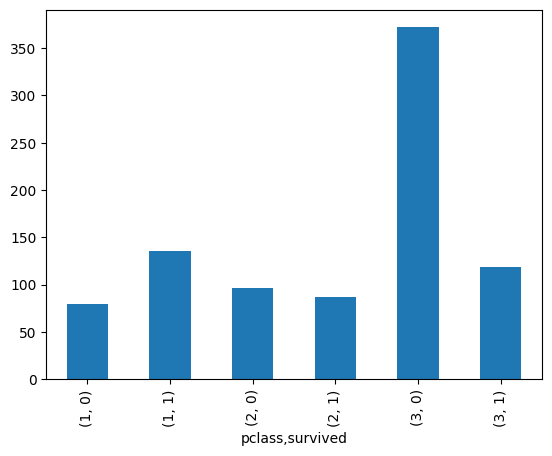

In [26]:
train[['pclass','survived']].value_counts().sort_index().plot(kind='bar')
plt.show() # 3등급 칸에 타면 사망 확률 높음

## 5.4 cabin : drop() 예정

In [27]:
train['cabin'][ train['cabin'].notna() ] 

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: cabin, Length: 204, dtype: object

In [28]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# cabin의 첫 글자 뽑기
train['cabin2'] = train['cabin'].str[0:1]
train[['cabin','cabin2']].head(3)

,cabin,cabin2
0,NaN,NaN
1,C85,C
2,NaN,NaN


In [30]:
# cabin 사용 여부와 생존여부의 연관성 ?  cabin과 생존의 연관성은 작다
train[['cabin2','survived']].value_counts().sort_index()

cabin2  survived
A       0            8
        1            7
B       0           12
        1           35
C       0           24
        1           35
D       0            8
        1           25
E       0            8
        1           24
F       0            5
        1            8
G       0            2
        1            2
T       0            1
dtype: int64

In [31]:
# A~D위치는 1등급사람들만 이용 
# 1등급 칸의 사람들이 cabin을 많이 이용
# cabin 위치에 따라 생존 여부가 달라지나? NO   -->  pclass를 기준으로 생존여부를 분석
train[['cabin2','pclass']].value_counts().sort_index()

cabin2  pclass
A       1         15
B       1         47
C       1         59
D       1         29
        2          4
E       1         25
        2          4
        3          3
F       2          8
        3          5
G       3          4
T       1          1
dtype: int64

In [32]:
train.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'cabin2'],
      dtype='object')

<pre>
'name', 'sex', 'age', ('sibsp', 'parch'), 
'ticket',('sibsp', 'parch'),  'fare', 'pclass',
'embarked'

## 5.5 embarked : 최빈도 mode()

### 5.5.1 embarked와 survived와의 연관성

In [33]:
# S > C > Q 순으로 사람들이 많이 탐
train['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [34]:
train[['embarked','survived']].value_counts().sort_index()

embarked  survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [35]:
# 카테고리 별 탑승자 수
em=train['embarked'].value_counts()

In [36]:
# 카테고리 별 사망자 수
di=train['embarked'][train['survived']==0].value_counts() 

In [37]:
# 카테고리별 사망률
# 경유지 S에서 사망률 가장 높음  ---> 그러나 경유지에 따라 사망한다고 주장하기에는 부족
# 사망률 : S > Q > C
sur_per=round((di/em)*100,2)
sur_per

S    66.30
C    44.64
Q    61.04
Name: embarked, dtype: float64

### 5.5.2 결측 처리

In [38]:
# 결측 확인
train['embarked'].isna().sum()

2

In [39]:
train[['embarked','sex']].describe()
# describe() 는 object에서는 수치형 자료들에서 실행 했을 때와 다른 결과 나옴  : top 최빈도

,embarked,sex
count,889,891
unique,3,2
top,S,male
freq,644,577


In [40]:
train[train['embarked'].isna()==True]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [41]:
# 일반적으로 최빈값으로 결측을 채움(함수 활용)
# mode는 array 값을 반환하기 때문에 인덱스로 값을 꺼내기
train['embarked'].mode().values[0]

'S'

In [42]:
train['embarked']=train['embarked'].fillna(train['embarked'].mode().values[0])

In [43]:
#확인용
train['embarked'].isna().sum()

0

## 5.6 sex , age

### 5.6.1 sex : 주요 feature

In [44]:
train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [45]:
# 남성의 사망자 수가 많음
train[['sex', 'survived']].value_counts().sort_index()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

select max(count(age)),max(count(sex))from train where survied ==0; 

In [46]:
#21살의 남성의 사망자 수 가장 많음
train[['age','sex']][train['survived']==0].mode() 

,age,sex
0,21.0,male


### 5.6.2 age 결측 처리

In [47]:
#age에 결측 존재
train['age'].isna().sum()

177

In [48]:
train['age'].describe()
# 젊은 사람이 많음(왜도 : 한쪽으로 데이터가 치우쳐있음)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [49]:
train['name'][train['age'].isna()==True]

5                              Moran, Mr. James
17                 Williams, Mr. Charles Eugene
19                      Masselmani, Mrs. Fatima
26                      Emir, Mr. Farred Chehab
28                O'Dwyer, Miss. Ellen "Nellie"
                         ...                   
859                            Razi, Mr. Raihed
863           Sage, Miss. Dorothy Edith "Dolly"
868                 van Melkebeke, Mr. Philemon
878                          Laleff, Mr. Kristo
888    Johnston, Miss. Catherine Helen "Carrie"
Name: name, Length: 177, dtype: object

#### 5.6.2.1 호칭 분리 ( 주요 Feature )

##### 1) 정규표현식
- match(), search(), findall()
- re.search(패턴, 타겟문장)
- p=re.compile(패턴) p.search(타겟문장)

In [50]:
#train['name'].str.extract('(정규표현식)')
train['name_title']=train['name'].str.extract('(\s[\w]+[.]\s)') #반드시 그룹으로 묶기 ()
train['name_title']=train['name_title'].str.strip()
train[['name_title','name']].tail()

,name_title,name
886,Rev.,"Montvila, Rev. Juozas"
887,Miss.,"Graham, Miss. Margaret Edith"
888,Miss.,"Johnston, Miss. Catherine Helen ""Carrie"""
889,Mr.,"Behr, Mr. Karl Howell"
890,Mr.,"Dooley, Mr. Patrick"


- name_title 평균나이

In [51]:
train['name_title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: name_title, dtype: int64

In [52]:
train.groupby('name_title')['age'].mean()

name_title
Capt.        70.000000
Col.         58.000000
Countess.    33.000000
Don.         40.000000
Dr.          42.000000
Jonkheer.    38.000000
Lady.        48.000000
Major.       48.500000
Master.       4.574167
Miss.        21.773973
Mlle.        24.000000
Mme.         24.000000
Mr.          32.368090
Mrs.         35.898148
Ms.          28.000000
Rev.         43.166667
Sir.         49.000000
Name: age, dtype: float64

##### 2) 피쳐 값 변경

<호칭 정리>
<pre>
Rev.        목사           -->Mr.  
Capt.       해군           -->Mr.
Major.      미군계급        -->Mr. 
Col.
Sir.        귀족 남성      --> Mr.
Don.        상대 남성 존칭  -->Mr.
Jonkheer.   무작위 귀족     -->Mr.

Countess.   백작부인       --> Mrs.
Mme.        Madam         -->Mrs.

Mlle.       어린여자아이   --> Miss.
Lady.       젊은 여성      --> Miss.
Ms.         결혼 여부      -->Miss.

In [53]:
dic = {  'Mr.':'Mr.',
         'Rev.':'Mr.',
         'Don.':'Mr.',
         'Jonkheer.':'Mr.',
         'Major.':'Mr.',
         'Col.':'Mr.',
         'Capt.':'Mr.',
         'Sir.':'Mr.',
         
         'Mrs.':'Mrs.', 
         'Countess.':'Mrs.',
         'Mme.':'Mrs.',
         
         'Miss.': 'Miss.',
         'Mlle.':'Miss.',
         'Ms.':'Miss.', 
         'Lady.':'Miss.',
         
         'Master.':'Master.',
         'Dr.':'Dr.'           
        }
#map은 dic에 넣지 않은 값들은 모두 결측으로 처리되기 때문에 모든 값들을 넣어주어야 함
train['name_title2'] = train['name_title'].map(dic)
train[['name_title','name_title2']].head()

,name_title,name_title2
0,Mr.,Mr.
1,Mrs.,Mrs.
2,Miss.,Miss.
3,Mrs.,Mrs.
4,Mr.,Mr.


In [54]:
train['name_title2'].isna().sum()

0

##### 3) name, name_title 삭제

In [55]:
train.drop(['name','name_title'],axis=1,inplace=True)

In [56]:
train.head(1)

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title2
0,0,3,male,22.0,1,0,A/5 21171,7.25,NaN,S,NaN,Mr.


#### 5.6.2.2 호칭 별 평균나이 
- <font color='red'><b> train.groupby('name_title2')['age'].transform(np.mean) </font></b>

In [57]:
train.groupby('name_title2')['age'].mean()

name_title2
Dr.        42.000000
Master.     4.574167
Miss.      22.020000
Mr.        32.891990
Mrs.       35.763636
Name: age, dtype: float64

In [58]:
#train.groupby('name_title2',group_keys=True)['age'].transform(lambda gdf : gdf.fillna(gdf.mean()))
train['age2']=train['age'].fillna(train.groupby('name_title2',group_keys=True)['age'].transform("mean"))
train[['name_title2','age','age2']][train['age'].isna()]

,name_title2,age,age2
5,Mr.,NaN,32.891990
17,Mr.,NaN,32.891990
19,Mrs.,NaN,35.763636
26,Mr.,NaN,32.891990
28,Miss.,NaN,22.020000
...,...,...,...
859,Mr.,NaN,32.891990
863,Miss.,NaN,22.020000
868,Mr.,NaN,32.891990
878,Mr.,NaN,32.891990


In [59]:
# 호칭은 생존 여부에 중요한 역할 --> 주요 feature
# 여성들의 생존률이 압도적으로 높음
train[['name_title2','survived']].value_counts().sort_index()

name_title2  survived
Dr.          0             4
             1             3
Master.      0            17
             1            23
Miss.        0            55
             1           131
Mr.          0           447
             1            84
Mrs.         0            26
             1           101
dtype: int64

### 5.6.3 age
- age2 : name_title2 이용해서 호칭별 평균나이로 결측 채우기

- 나이 채우기

In [60]:
train[['age2','survived']].value_counts().sort_index()

age2   survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Length: 150, dtype: int64

#### 5.6.3.1 연령별 분포도

In [61]:
# 연령별 분포도
# 몫 : // , 나머지 : %
train['age_gugan']=  train['age2']//10
train['age_gugan']=train['age_gugan'].astype('int')
train[['age2','age_gugan']]

,age2,age_gugan
0,22.00,2
1,38.00,3
2,26.00,2
3,35.00,3
4,35.00,3
...,...,...
886,27.00,2
887,19.00,1
888,22.02,2
889,26.00,2


In [62]:
# 나이 하나로는 생존 여부 판별 어려움
train[['age_gugan','survived']].value_counts().sort_index()

age_gugan  survived
0          0            26
           1            40
1          0            61
           1            41
2          0           157
           1            99
3          0           202
           1           101
4          0            56
           1            34
5          0            28
           1            20
6          0            13
           1             6
7          0             6
8          1             1
dtype: int64

#### 5.6.3.2 pd. crosstab()
<pre>
def crosstab(
    <b>
    index,   --> y 축
    columns, --> x 축
    values=None,
    </b>
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: bool = False,
    margins_name: str = "All",
    dropna: bool = True,
    normalize=False,
) -> DataFrame:

In [63]:
# 등급과 관계 없이 노인들은 사망
# 3등급 칸은 나이와 관계 없이 사망률 매우 높음
# 머신러닝은 50을 기준으로 사망/생존 구분
pd.crosstab(index=[train['pclass'],train['sex']],
            columns=[train['age_gugan'],train['survived']]) #,values=train['survived'],aggfunc='sum')

age_gugan       0       1       2        3       4       5      6     7  8
survived        0   1   0   1   0   1    0   1   0   1   0   1  0  1  0  1
pclass sex                                                                
1      female   1   0   0  13   1  16    0  35   0  13   1  11  0  3  0  0
       male     0   2   3   2   9   9   26  17  16   9  11   4  9  1  3  1
2      female   0   8   0   8   3  24    1  16   1   9   1   5  0  0  0  0
       male     0   9   9   1  28   0   35   5   7   1   9   0  2  1  1  0
3      female  10  11  11  13  30  34   12  13   9   0   0   0  0  1  0  0
       male    15  10  38   4  86  16  128  15  23   2   6   0  2  0  2  0

## 5.7 sibsp, parch

In [64]:
train['family'] = train['sibsp']+ train['parch'] + 1 #(+1) : 본인 포함
train.sort_values(by='family',ascending =False).head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title2,age2,age_gugan,family
180,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Miss.,22.020000,2,11
846,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Mr.,32.891990,3,11
792,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Miss.,22.020000,2,11
201,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Mr.,32.891990,3,11
159,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Master.,4.574167,0,11


In [65]:
#동행자 정보를 티켓 번호로 확인 불가능
train[train['ticket']=='PC 17599']
train[train['ticket']=='CA. 2343'] # 일부 정보만 있음 # 발권만 해놓고 타지 않은 사람 존재

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title2,age2,age_gugan,family
159,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Master.,4.574167,0,11
180,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Miss.,22.020000,2,11
201,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Mr.,32.891990,3,11
324,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Mr.,32.891990,3,11
792,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Miss.,22.020000,2,11
846,0,3,male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Mr.,32.891990,3,11
863,0,3,female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Miss.,22.020000,2,11


In [66]:
# 동행자 수와 생존 여부와의 연관성?
train[['family','survived']].value_counts().sort_index()

family  survived
1       0           374
        1           163
2       0            72
        1            89
3       0            43
        1            59
4       0             8
        1            21
5       0            12
        1             3
6       0            19
        1             3
7       0             8
        1             4
8       0             6
11      0             7
dtype: int64

In [67]:
# 11명의 가족 3등급칸에 탑승... 3등급칸이기 때문에 사망?
# 3등급에 가족을 조금 데리고 타면 생존 확률이 높은가? 
# 등급에 상관 없이 보통 2-3인체제일 경우 생존 확률 높음
pd.crosstab(index=[train['pclass'],train['survived']]
            , columns = train['family']
           )

family            1   2   3   4   5   6   7   8   11
pclass survived                                     
1      0          51  19   6   2   0   2   0   0   0
       1          58  51  18   5   2   2   0   0   0
2      0          68  16  10   3   0   0   0   0   0
       1          36  18  21  10   1   1   0   0   0
3      0         255  37  27   3  12  17   8   6   7
       1          69  20  20   6   0   0   4   0   0

In [68]:
train[train['family']==3].head() # 형제가 있거나, 자녀가 있는경우

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title2,age2,age_gugan,family
8,1,3,female,27.0,0,2,347742,11.1333,NaN,S,NaN,Mrs.,27.000000,2,3
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,G,Miss.,4.000000,0,3
38,0,3,female,18.0,2,0,345764,18.0000,NaN,S,NaN,Miss.,18.000000,1,3
48,0,3,male,NaN,2,0,2662,21.6792,NaN,C,NaN,Mr.,32.891990,3,3
65,1,3,male,NaN,1,1,2661,15.2458,NaN,C,NaN,Master.,4.574167,0,3


## 5.8 fare per family
- 두당요금 : ticket, (sibsp, parch) ,fate, pclass 관계

In [69]:
train['fare2']= train['fare']/train['family']
train.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title2,age2,age_gugan,family,fare2
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,Mr.,22.0,2,2,3.62500
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.,38.0,3,2,35.64165
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss.,26.0,2,1,7.92500
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,C,Mrs.,35.0,3,2,26.55000
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN,Mr.,35.0,3,1,8.05000


In [70]:
train['fare2'].min() , train['fare2'].max() 
# 0원?
# 요금을 많이냈을 수록 높은 등급에 탔을 가능성 높음 --> pclass 확인 가능하기 때문에 불필요

(0.0, 512.3292)

In [71]:
train[train['fare2']==0] # 승무원일 확률 높음 --> 대부분 사망

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title2,age2,age_gugan,family,fare2
179,0,3,male,36.0,0,0,LINE,0.0,NaN,S,NaN,Mr.,36.00000,3,1,0.0
263,0,1,male,40.0,0,0,112059,0.0,B94,S,B,Mr.,40.00000,4,1,0.0
271,1,3,male,25.0,0,0,LINE,0.0,NaN,S,NaN,Mr.,25.00000,2,1,0.0
277,0,2,male,NaN,0,0,239853,0.0,NaN,S,NaN,Mr.,32.89199,3,1,0.0
302,0,3,male,19.0,0,0,LINE,0.0,NaN,S,NaN,Mr.,19.00000,1,1,0.0
413,0,2,male,NaN,0,0,239853,0.0,NaN,S,NaN,Mr.,32.89199,3,1,0.0
466,0,2,male,NaN,0,0,239853,0.0,NaN,S,NaN,Mr.,32.89199,3,1,0.0
481,0,2,male,NaN,0,0,239854,0.0,NaN,S,NaN,Mr.,32.89199,3,1,0.0
597,0,3,male,49.0,0,0,LINE,0.0,NaN,S,NaN,Mr.,49.00000,4,1,0.0
633,0,1,male,NaN,0,0,112052,0.0,NaN,S,NaN,Mr.,32.89199,3,1,0.0


In [72]:
train[train['fare2']==train['fare2'].max()] 

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin2,name_title2,age2,age_gugan,family,fare2
258,1,1,female,35.0,0,0,PC 17755,512.3292,NaN,C,NaN,Miss.,35.0,3,1,512.3292
737,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C,B,Mr.,35.0,3,1,512.3292


## 5.9 삭제 컬럼
- passengerid : all unique
- 파생 피쳐 생성으로 인한 불필요 컬럼 : 
    - 'age' -- > 'age2'(결측처리) --> 'age_gugan' 
    - 'sibsp', 'parch' --> 'family'
    - 'ticket', 'cabin', 'embarked'
    - 'name' --> 'name_title'(호칭) -->'name_title2'(5개로 호칭 통일)
    - 'fare' --> 'fare2'(두당 요금)

- 불필요컬럼삭제 or 필요한 컬럼만 복제

In [73]:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'cabin2', 'name_title2', 'age2', 'age_gugan',
       'family', 'fare2'],
      dtype='object')

In [74]:
train= train[['survived', 'pclass', 'sex','age2', 'age_gugan', 'name_title2', 'family','age']].copy()
train.head()

,survived,pclass,sex,age2,age_gugan,name_title2,family,age
0,0,3,male,22.0,2,Mr.,2,22.0
1,1,1,female,38.0,3,Mrs.,2,38.0
2,1,3,female,26.0,2,Miss.,1,26.0
3,1,1,female,35.0,3,Mrs.,2,35.0
4,0,3,male,35.0,3,Mr.,1,35.0


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age2         891 non-null    float64
 4   age_gugan    891 non-null    int32  
 5   name_title2  891 non-null    object 
 6   family       891 non-null    int64  
 7   age          714 non-null    float64
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.3+ KB


## + 피쳐 값 변경
1) df.replace('A','B', inplace=True)
2) df.map({'A':'B'})
3) df.apply(lambda)

### 1. replace()

In [76]:
traincp=train.copy()
traincp['pclass'].replace(3,33, inplace=True)

traincp['pclass'].replace([1,2,3],[11,22,33], inplace=True)
traincp.head()

,survived,pclass,sex,age2,age_gugan,name_title2,family,age
0,0,33,male,22.0,2,Mr.,2,22.0
1,1,11,female,38.0,3,Mrs.,2,38.0
2,1,33,female,26.0,2,Miss.,1,26.0
3,1,11,female,35.0,3,Mrs.,2,35.0
4,0,33,male,35.0,3,Mr.,1,35.0


### 2. map()

In [77]:
dic={"male":1,"female":0}
traincp['sex']=traincp['sex'].map(dic)
traincp.head(3)

,survived,pclass,sex,age2,age_gugan,name_title2,family,age
0,0,33,1,22.0,2,Mr.,2,22.0
1,1,11,0,38.0,3,Mrs.,2,38.0
2,1,33,0,26.0,2,Miss.,1,26.0


### 3. apply(lambda)

In [78]:
traincp['sex']=traincp['sex'].apply(lambda x : 'male' if x==1 else 'female' )
traincp.head()

,survived,pclass,sex,age2,age_gugan,name_title2,family,age
0,0,33,male,22.0,2,Mr.,2,22.0
1,1,11,female,38.0,3,Mrs.,2,38.0
2,1,33,female,26.0,2,Miss.,1,26.0
3,1,11,female,35.0,3,Mrs.,2,35.0
4,0,33,male,35.0,3,Mr.,1,35.0


### 4. iloc(), loc()

In [79]:
del traincp

## + 함수 일괄 적용

ref : https://steadiness-193.tistory.com/42
<pre>
train.groupby('name_title2')['age'].mean().apply()
train.groupby('name_title2')['age'].mean().transform()

In [80]:
emp= pd.read_csv("../lec08_emp.csv")
emp.columns=emp.columns.str.lower()
emp.head(2)

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,1980-12-17 00:00:00,800,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20 00:00:00,1600,300.0,30


In [81]:
emp.groupby('deptno')['sal'].mean()

deptno
10    2916.666667
20    2175.000000
30    1566.666667
Name: sal, dtype: float64

In [82]:
emp['sal'][emp['deptno']==10]

6     2450
8     5000
13    1300
Name: sal, dtype: int64

In [83]:
# apply 그룹한 결과 반환
#연산이 안되는 컬럼이 있으면 에러
emp.groupby('deptno').apply(np.mean)
#emp.groupby('deptno')['sal'].apply(np.mean)

,empno,mgr,sal,comm,deptno
deptno,,,,,
10,7851.666667,7810.5,2916.666667,NaN,10.0
20,7700.200000,7732.2,2175.000000,NaN,20.0
30,7686.000000,7721.5,1566.666667,550.0,30.0


In [84]:
# transform은 원본 유형 그대로를 유지  --> 추천
emp.groupby('deptno').transform("mean")
#emp.groupby('deptno')['sal'].transform(np.mean)

,empno,mgr,sal,comm
0,7700.200000,7732.2,2175.000000,NaN
1,7686.000000,7721.5,1566.666667,550.0
2,7686.000000,7721.5,1566.666667,550.0
3,7700.200000,7732.2,2175.000000,NaN
4,7686.000000,7721.5,1566.666667,550.0
5,7686.000000,7721.5,1566.666667,550.0
6,7851.666667,7810.5,2916.666667,NaN
7,7700.200000,7732.2,2175.000000,NaN
8,7851.666667,7810.5,2916.666667,NaN
9,7686.000000,7721.5,1566.666667,550.0


### 1. 컬럼명을 메서드 밖에서 명시 --> 결과 동일

In [85]:
traincp=train.copy()
traincp.head(2)

,survived,pclass,sex,age2,age_gugan,name_title2,family,age
0,0,3,male,22.0,2,Mr.,2,22.0
1,1,1,female,38.0,3,Mrs.,2,38.0


In [86]:
def age_minus(x):
    return x-1

traincp.groupby('name_title2',group_keys=True)['age'].apply(age_minus).head(3)

name_title2     
Dr.          245    43.0
             317    53.0
             398    22.0
Name: age, dtype: float64

In [87]:
# apply와 결과 다름...
traincp.groupby('name_title2',group_keys=True)['age'].transform(age_minus).head(3)  

0    21.0
1    37.0
2    25.0
Name: age, dtype: float64

### 2. 컬럼명 메소드 안에서 명시

In [88]:
traincp.groupby('name_title2').apply(lambda gdf : age_minus(gdf['age'])).head(3)

name_title2     
Dr.          245    43.0
             317    53.0
             398    22.0
Name: age, dtype: float64

In [89]:
# transform 에러
#traincp.groupby('name_title2').transform(lambda gdf : age_minus(gdf['age'])).head(3)

### 3. 컬럼명을 사용하지 않은 경우
- 컬럼명 메서드 안과 밖에 모두 명시하지 않음

In [90]:
#데이터프레임 전체를 대상으로 함수를 적용하면 : 연산이 되는 컬럼만 골라서 연산한다.
def age_minus(x):
    return x-1

traincp.groupby('name_title2',group_keys=True).transform(age_minus).head(3)

,survived,pclass,age2,age_gugan,family,age
0,-1,2,21.0,1,1,21.0
1,0,0,37.0,2,1,37.0
2,0,2,25.0,1,0,25.0


In [91]:
# apply 에러 
# -1 연산이 안되는 글자 컬럼들이 있기 때문
#traincp.groupby('name_title2').apply(age_minus).head(3)  

### 4. 연산 가능한 컬럼만 함수 적용한다면
#fill_mean_func = lambda g : g.fillna(g.mean())

In [92]:
#연산가능한 컬럼만 빼기
traincp2= traincp.groupby('name_title2', as_index=False)[['age','fare']]
traincp2=traincp2.count() # g.count() : group화된 프레임 --> 데이터프레임으로 변경
traincp2

KeyError: "Columns not found: 'fare'"

In [ ]:
traincp2.groupby('name_title2',group_keys=True).apply(lambda gdf : gdf.fillna(gdf.mean()))

In [ ]:
traincp2.groupby('name_title2',group_keys=True).transform(lambda gdf : gdf.fillna(gdf.mean()))

In [ ]:
del traincp
del traincp2

### 5. pivot_table
<pre>
    def pivot_table(
    
        self,
        values=None,
        index=None,
        columns=None,
        aggfunc="mean",
        
        
        fill_value=None,
        margins=False,
        dropna=True,
        margins_name="All",
        observed=False,
        sort=True,
    )

In [93]:
emp.pivot_table(index='deptno', values='sal',aggfunc="mean")

,sal
deptno,
10,2916.666667
20,2175.000000
30,1566.666667


In [94]:
#동일결과
emp.groupby('deptno')['sal'].mean()

deptno
10    2916.666667
20    2175.000000
30    1566.666667
Name: sal, dtype: float64

# 6. 최종 피쳐
- 결측이 있어서는 안된다
- object가 있어서는 안된다
- 컴퓨터는 글자를 학습할 수 없다 --> 숫자로 바꾸기

## 6.1. 결측 확인

In [95]:
train.isna().sum()

survived         0
pclass           0
sex              0
age2             0
age_gugan        0
name_title2      0
family           0
age            177
dtype: int64

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age2         891 non-null    float64
 4   age_gugan    891 non-null    int32  
 5   name_title2  891 non-null    object 
 6   family       891 non-null    int64  
 7   age          714 non-null    float64
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.3+ KB


## 6.2. object 타입의 컬럼 뽑기

In [97]:
train.select_dtypes('object').columns

Index(['sex', 'name_title2'], dtype='object')

In [98]:
train.dtypes[train.dtypes=='object'].index

Index(['sex', 'name_title2'], dtype='object')

In [99]:
train['sex'].value_counts().sort_index(), train['name_title2'].value_counts().sort_index()

(female    314
 male      577
 Name: sex, dtype: int64,
 Dr.          7
 Master.     40
 Miss.      186
 Mr.        531
 Mrs.       127
 Name: name_title2, dtype: int64)

## 6.3. 수치값으로 변경
1. replace()
2. map()
3. apply(lambda)
4. loc(줄, 칸)
5. <font color='red'><b> pd.get_dummies() = 자동결측처리 + LabelEncoder() + OneHotEncoder() 
    - 반드시 사용 전 원하는 결측처리를 하고 사용 권장 </font></b>
<br>
<pre>
<참고용 : lec10_Object처리>
* 라벨인코딩(Label Encoding)
* 원핫인코딩(One-hot Encoding)
* df[컬럼].astype('category')

In [ ]:
#train['sex'].replace(['female','male'],[0,1])

In [ ]:
#train['name_title2'].replace(['Dr.','Master.','Miss.','Mr.','Mrs'],[1,2,3,4,5])

In [ ]:
#train.head()

### 6.3.1 sex objet
- male : 0 / female : 1

- 방법 1) LabelEncoder

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le = LabelEncoder() # 클래스 이름() == 생성자 함수 : 초기화
le.fit(train['sex']) #모든 값을 사전순으로 메모리에 올려놓고 distinct , 변수 사용 금지
train['sex_le']=le.transform(train['sex']) # 변환

train[['sex','sex_le']].head()

,sex,sex_le
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


- 방법 2) OneHotEncoder

In [102]:
from sklearn.preprocessing import OneHotEncoder

In [103]:
oe = OneHotEncoder(sparse=False, dtype='int')
oe.fit(    train['sex'].values.reshape(-1,1)   )  # 반드시 2차**** 넣기

#train['sex'].reshape(-1,1) --> 안됨
res= oe.transform(  train['sex'].values.reshape(-1,1)  ) # 반드치 array 타입으로 넣어주기 : .values는 array 타입으로 결과 반환 

ohdf= pd.DataFrame(res,columns=oe.categories_[0])
ohdf.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [104]:
tdf=pd.concat([train,ohdf], axis=1)
tdf.head(2)

,survived,pclass,sex,age2,age_gugan,name_title2,family,age,sex_le,female,male
0,0,3,male,22.0,2,Mr.,2,22.0,1,0,1
1,1,1,female,38.0,3,Mrs.,2,38.0,0,1,0


### 6.3.2 name_title2 objet
- 'Dr.' : 1 
- 'Master.' : 2 
- 'Miss.' : 3 
- 'Mr.' : 4
- 'Mrs' : 5

- 방법 3) categories

In [105]:
train['name_title2']=train['name_title2'].astype('category')

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age2         891 non-null    float64 
 4   age_gugan    891 non-null    int32   
 5   name_title2  891 non-null    category
 6   family       891 non-null    int64   
 7   age          714 non-null    float64 
 8   sex_le       891 non-null    int32   
dtypes: category(1), float64(2), int32(2), int64(3), object(1)
memory usage: 49.9+ KB


- 방법 4) get_dummies

In [107]:
gdf=pd.get_dummies(train['name_title2'])
gdf.head()

,Dr.,Master.,Miss.,Mr.,Mrs.
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,1,0


In [108]:
tdf=pd.concat([train,gdf],axis=1)
tdf.head()

,survived,pclass,sex,age2,age_gugan,name_title2,family,age,sex_le,Dr.,Master.,Miss.,Mr.,Mrs.
0,0,3,male,22.0,2,Mr.,2,22.0,1,0,0,0,1,0
1,1,1,female,38.0,3,Mrs.,2,38.0,0,0,0,0,0,1
2,1,3,female,26.0,2,Miss.,1,26.0,0,0,0,1,0,0
3,1,1,female,35.0,3,Mrs.,2,35.0,0,0,0,0,0,1
4,0,3,male,35.0,3,Mr.,1,35.0,1,0,0,0,1,0
